In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Datadirectory = "/content/drive/MyDrive/CK+48"

In [4]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

In [5]:
Data = []
img_size = 224

def create_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        count = 0
        for img in os.listdir(path):
            
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                Data.append([new_array, class_num])
            except Exception as e:
                pass

In [6]:
create_Data()

In [8]:
len(Data)

981

In [ ]:
import random

random.shuffle(Data)

In [ ]:
X = []
y = []

for features, label in Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X = X/255.0

In [ ]:
Y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test , test_size=0.5)

In [ ]:
import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
# history = new_model.fit(X_train, y_train, batch_size = 128, 
#                     epochs = 25, validation_data =(X_val, y_val), 
#                     callbacks =[earlystopping])

history = new_model.fit(X_train, y_train,
                    epochs = 25, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])

Epoch 1/25
25/25 [==============================] - 159s 6s/step - loss: 0.7961 - accuracy: 0.7232 - val_loss: 14.4147 - val_accuracy: 0.2741
Epoch 2/25
25/25 [==============================] - 151s 6s/step - loss: 0.1865 - accuracy: 0.9401 - val_loss: 15.9064 - val_accuracy: 0.2741
Epoch 3/25
25/25 [==============================] - 148s 6s/step - loss: 0.1455 - accuracy: 0.9566 - val_loss: 13.4339 - val_accuracy: 0.3401
Epoch 4/25
25/25 [==============================] - 149s 6s/step - loss: 0.1686 - accuracy: 0.9566 - val_loss: 17.4175 - val_accuracy: 0.1675
Epoch 5/25
25/25 [==============================] - 151s 6s/step - loss: 0.1070 - accuracy: 0.9668 - val_loss: 11.7980 - val_accuracy: 0.3046
Epoch 6/25
25/25 [==============================] - 152s 6s/step - loss: 0.0419 - accuracy: 0.9911 - val_loss: 16.1206 - val_accuracy: 0.2741
Epoch 7/25
25/25 [==============================] - 148s 6s/step - loss: 0.0562 - accuracy: 0.9872 - val_loss: 16.4195 - val_accuracy: 0.2741
Epoch 

In [ ]:
new_model.evaluate(X_test, y_test)

7/7 [==============================] - 5s 756ms/step - loss: 8.8823 - accuracy: 0.2690


[8.88231372833252, 0.2690355181694031]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


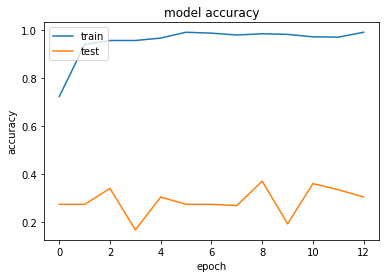

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

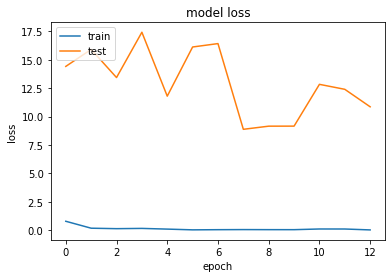

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
frame = cv2.imread('/content/drive/MyDrive/HAPPY1.jpg')

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print("face not detected")
  else:
    for (ex, ey, ew, eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex:ex + ew]

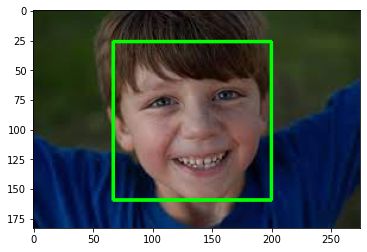

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

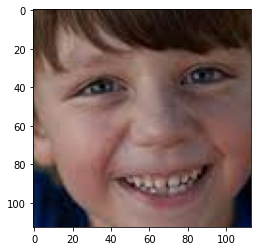

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
Predictions = new_model.predict(final_image)
np.argmax(Predictions)

6